#   Prediction of Salary Class of an Individual Using Logistic Regression

In [26]:
#Importing the libraries
import numpy as np
import pandas as pd# data processing for input, for instance to import CSV file 
import warnings
warnings.filterwarnings('ignore')


In [27]:
adult_data = pd.read_csv("C:/Users/Vineeth Billakanti/Desktop/ML & DL/Final project/adult.csv") #reading the CSV file
adult_data.head() #displayng few results of the CSV file 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
adult_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
adult_data.income.value_counts() #Count of how many people have income <=50K and >50K

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [30]:
adult_data['income'] = adult_data['income'].map({'<=50K': 0, '>50K': 1})
adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [31]:
print(adult_data.info()) #Displaying all the data information
print(adult_data.shape) #Displays the shape of the arrays

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
None
(32561, 15)


In [32]:
adult_data.isnull().sum() #Checking whether do we have null values or not in the given data set

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [33]:
adult_data.isin(['?']).sum() #We can see '?'in the dataset

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [34]:
adult_data.replace('?', np.nan , inplace=True) #Replacing the '?' with null value.

In [35]:
adult_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [36]:
adult_data['workclass'] = adult_data['workclass'].fillna(adult_data['workclass'].mode()[0])
adult_data['occupation'] = adult_data['occupation'].fillna(adult_data['occupation'].mode()[0])
adult_data['native.country'] = adult_data['native.country'].fillna(adult_data['native.country'].mode()[0])

In [37]:
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
for col in adult_data.columns:
    if adult_data[col].dtypes == 'object':
        le = LabelEncoder()
        adult_data[col] = le.fit_transform(adult_data[col].astype(str))
        
adult_data.dtypes #We can see some of the variables are not integers, we employ a label encoder to transform them to integers so that they may be fitted to the model.

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int64
dtype: object

In [39]:
X = adult_data.drop(['income'],axis = 1)
y = adult_data['income']
print(X)
print(y)

       age  workclass  fnlwgt  education  education.num  marital.status  \
0       90          3   77053         11              9               6   
1       82          3  132870         11              9               6   
2       66          3  186061         15             10               6   
3       54          3  140359          5              4               0   
4       41          3  264663         15             10               5   
...    ...        ...     ...        ...            ...             ...   
32556   22          3  310152         15             10               4   
32557   27          3  257302          7             12               2   
32558   40          3  154374         11              9               2   
32559   58          3  151910         11              9               6   
32560   22          3  201490         11              9               4   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
0               9        

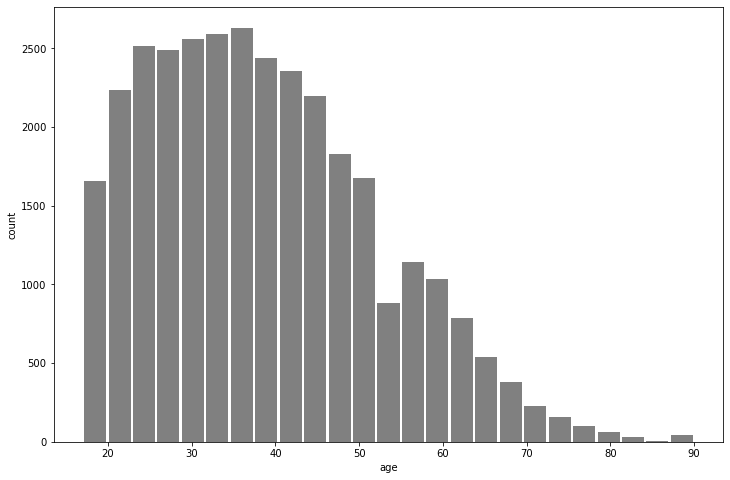

In [40]:
import matplotlib.pyplot as plt  #Data Exploration
adult_data.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#808080', zorder=2, rwidth=0.9)
##plt.bar(adult_data,adult_data['income'])
plt.xlabel('age')
plt.ylabel('count')
plt.title('')
plt.show()

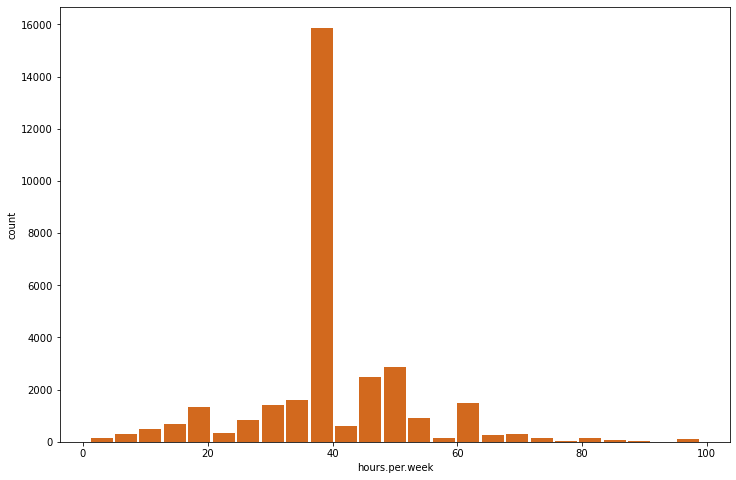

In [41]:
import matplotlib.pyplot as plt
adult_data.hist(column='hours.per.week', bins=25, grid=False, figsize=(12,8), color='#D2691E', zorder=2, rwidth=0.9)
##plt.bar(adult_data,adult_data['income'])
plt.xlabel('hours.per.week')
plt.ylabel('count')
plt.title('')
plt.show()

In [42]:
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']

cat_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

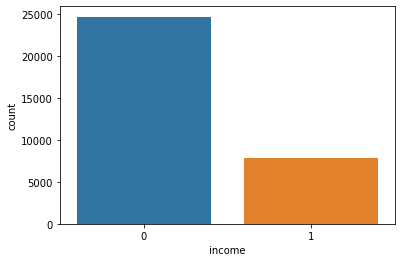

In [18]:
import seaborn as sns  #Income counts
sns.countplot(adult_data['income'])
plt.show()

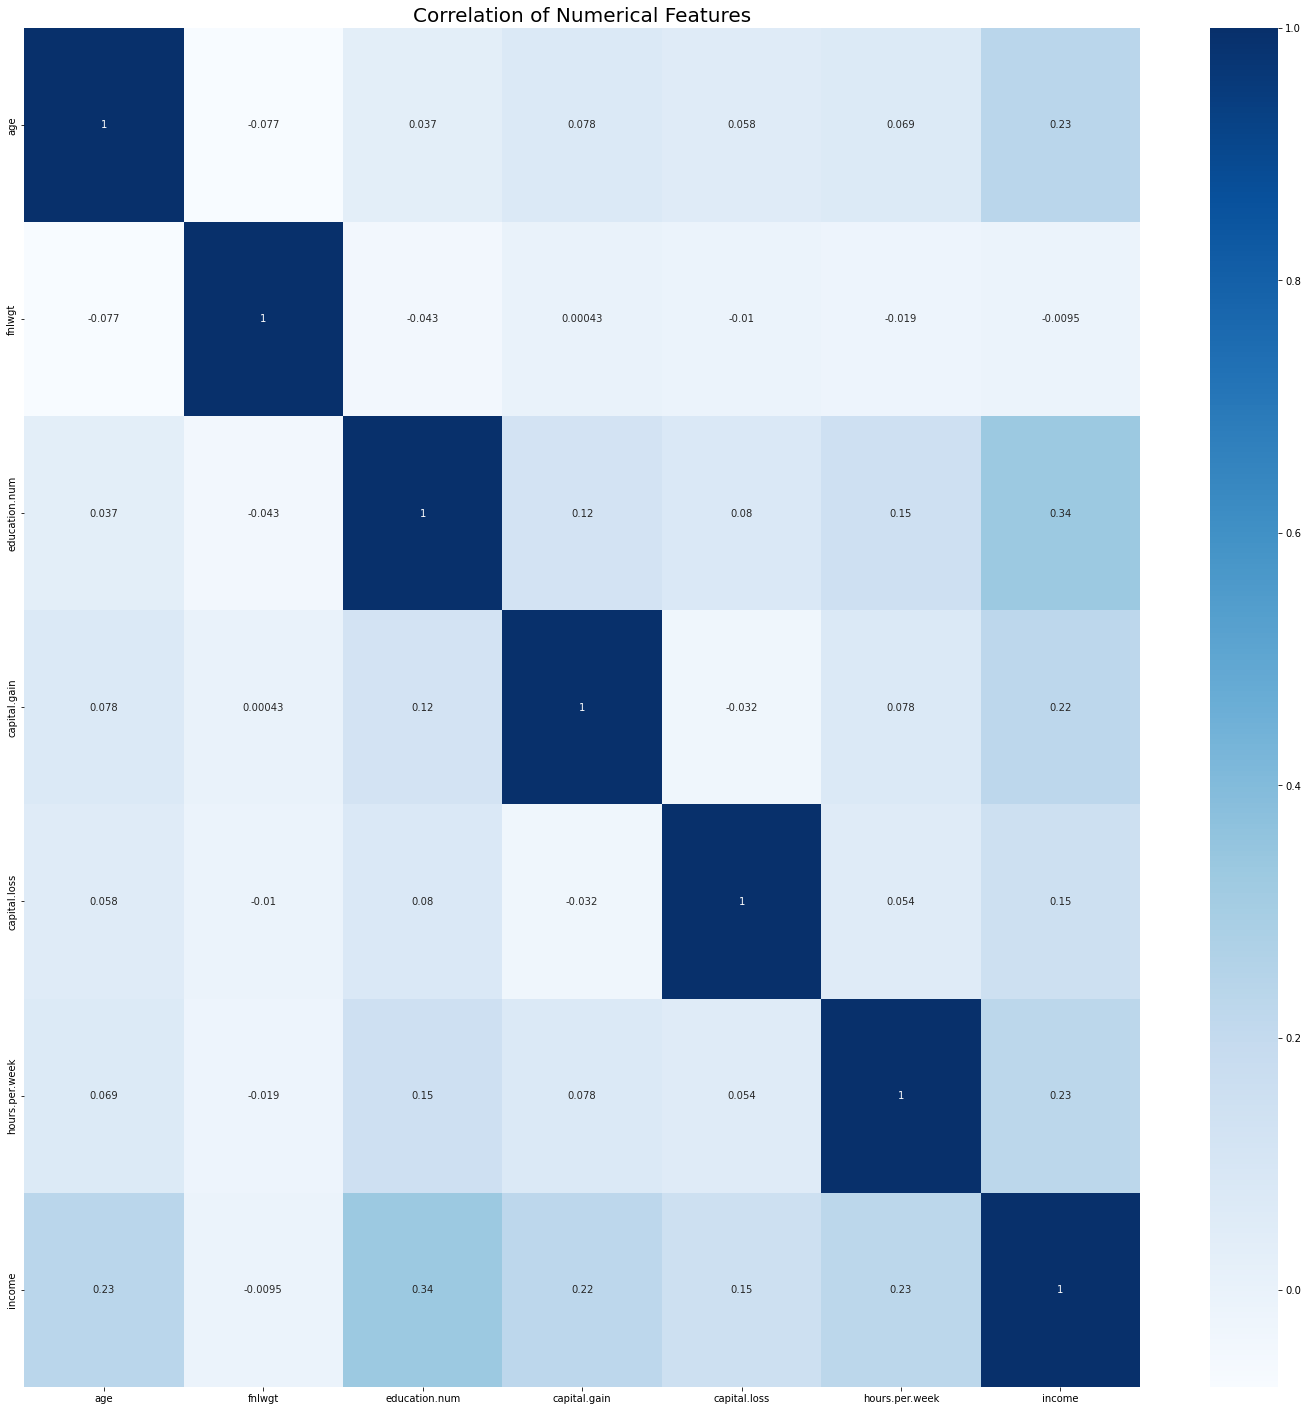

In [19]:
#Plotting for the numerical features
fig, ax = plt.subplots(figsize=(25, 25))
p = sns.heatmap(adult_data[num_features].corr(), annot=True, cmap="Blues")
plt.title("Correlation of Numerical Features", fontsize=20)
plt.show()

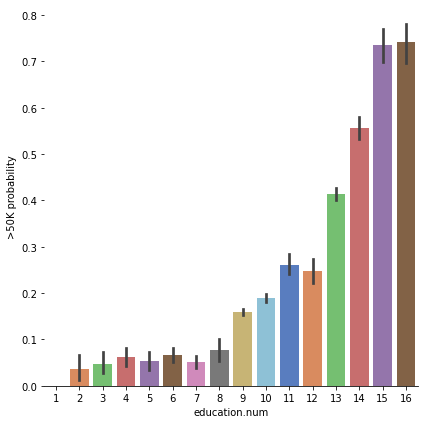

In [20]:
#Education Number vs Income
g = sns.catplot(x="education.num",y="income",data=adult_data,kind="bar",height = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [21]:
from sklearn.model_selection import train_test_split #Partitioning the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac_lr = round(accuracy_score(y_test, lr_pred)*100,2)

cm_lr = confusion_matrix(y_test, lr_pred)

In [25]:
results = pd.DataFrame({   
    'Model': ['Logistic Regression'],
    'Accuracy': [ac_lr],
    'Confusion_Matrix':[cm_lr]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(5) #confusion matrix
    

,Accuracy,Confusion_Matrix
Model,,
Logistic Regression,82.39,"[[4686, 290], [857, 680]]"
